In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import inequalipy as ineq
import math
from statistics import mean 

## 2013-2017 DATA

In [48]:
std_2017_df = pd.read_csv('../data/standard_dataframes/standard_acs_censustract_df_2017/standard_acs_censustract_df_2017.csv')

In [49]:
std_2017_df.head()

,Unnamed: 0,City,tract,state,county,STATEFP,COUNTYFP,geometry,Estimate!!Total: TOTAL POPULATION,Estimate!!Total: SEX BY AGE,...,PERC Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,PERC Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,Neighborhood
0,0,boston,91300,25.0,25.0,25,25,"POLYGON ((-71.072204 42.321359, -71.071738 42....",2559.000000,2559.000000,...,0.495897,0.504103,1.0,0.495897,0.504103,1.0,0.495897,0.504103,8,Roxbury
1,5,boston,82100,16.5,15.0,25,25,"POLYGON ((-71.092078 42.309947, -71.0918169999...",6424.500000,6424.500000,...,0.456161,0.543839,1.0,0.456161,0.543839,1.0,0.456161,0.543839,8,Roxbury
2,6,boston,70900,25.0,25.0,25,25,"POLYGON ((-71.08180999999999 42.338558, -71.08...",2966.000000,2966.000000,...,0.404931,0.595069,1.0,0.404931,0.595069,1.0,0.404931,0.595069,8,Roxbury
3,19,boston,120201,24.5,267.5,25,25,"POLYGON ((-71.115245 42.306632, -71.1149499999...",2881.500000,2881.500000,...,0.532535,0.467465,1.0,0.532535,0.467465,1.0,0.532535,0.467465,8,Roxbury
4,20,boston,980300,16.5,42.5,25,25,"POLYGON ((-71.106807 42.301026, -71.1067839999...",1035.166667,1035.166667,...,0.745223,0.254777,1.0,0.745223,0.254777,1.0,0.745223,0.254777,8,Roxbury


### Theil Index

In [50]:
def theil_index(df):    
    cities = list(df['City'].unique())
    
    result = pd.DataFrame("", index = cities, columns =['Theil Index'])

    for city in cities:
        df_city = df[df['City'] == city]
        df_city_broadband = df_city["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
        df_city_avg_broadband = df_city["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"].mean()
        broadband_quotient = df_city_broadband/df_city_avg_broadband
        log_quotient = np.log(broadband_quotient)
        quotient = broadband_quotient*log_quotient
        N = len(df_city)
        theil = quotient.sum()/N
        
        result.loc[city, 'Theil Index'] = theil
    
    result['Theil Index'] = result['Theil Index'].apply(pd.to_numeric)
    result = result.sort_values('Theil Index', ascending=False)
    
    
    return result

In [51]:
theil_df_2017 = theil_index(std_2017_df)
theil_df_2017.reset_index(inplace=True)
theil_df_2017 = theil_df_2017.rename(columns = {'index':'City'})
theil_df_2017['Theil rank'] = theil_df_2017['Theil Index'].rank(ascending=False)
theil_df_2017 = theil_df_2017.sort_values(by=['Theil Index'])
theil_df_2017

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,City,Theil Index,Theil rank
9,seattle,0.022170,10.0
8,louisville,0.034514,9.0
7,washington-dc,0.040715,8.0
6,denver,0.044317,7.0
5,indianapolis,0.102146,6.0
4,chicago,0.106029,5.0
3,houston,0.109846,4.0
2,los-angeles,0.112976,3.0
1,boston,0.141135,2.0
0,detroit,0.187340,1.0


### Atkinson Index

In [52]:
### coming soon
atkinson_df_2017 = pd.DataFrame()

### Palma Ratio

In [53]:
def palma_ratio(df):
    cities = list(df['City'].unique())
    
    result = pd.DataFrame("", index = cities, columns =['Palma Ratio'])
    
    for city in cities:
        df_city = df[df['City'] == city]
        df_city_broadband = df_city["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
        array_city_broadband = np.array(df_city_broadband)
        palma_r = np.percentile(array_city_broadband, 90)/np.percentile(array_city_broadband, 40)
        result.loc[city, 'Palma Ratio'] = palma_r
    
    result['Palma Ratio'] = result['Palma Ratio'].apply(pd.to_numeric)
    result = result.sort_values('Palma Ratio', ascending=False)
    
    return result

In [54]:
# A high Palma ratio indicates a greater degree of inequality or unequal broadband distribution in a city
palma_df_2017 = palma_ratio(std_2017_df)
palma_df_2017.reset_index(inplace=True)
palma_df_2017 = palma_df_2017.rename(columns = {'index':'City'})
palma_df_2017['Palma rank'] = palma_df_2017['Palma Ratio'].rank(ascending=False)
palma_df_2017 = palma_df_2017.sort_values(by=['Palma rank'])
palma_df_2017

,City,Palma Ratio,Palma rank
0,detroit,2.259071,1.0
1,indianapolis,2.025952,2.0
2,houston,1.970360,3.0
3,los-angeles,1.957396,4.0
4,chicago,1.733031,5.0
5,boston,1.556216,6.0
6,denver,1.457260,7.0
7,louisville,1.372145,8.0
8,seattle,1.356747,9.0
9,washington-dc,1.345314,10.0


### Decile Ratio

In [55]:
def decile_ratio(df):
    cities = list(df['City'].unique())
    
    result = pd.DataFrame("", index = cities, columns =['Decile Ratio'])
    
    for city in cities:
        df_city = df[df['City'] == city]
        df_city_broadband = df_city["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
        array_city_broadband = np.array(df_city_broadband)
        decile_r = np.percentile(array_city_broadband, 90)/np.percentile(array_city_broadband, 10)
        result.loc[city, 'Decile Ratio'] = decile_r
    
    result['Decile Ratio'] = result['Decile Ratio'].apply(pd.to_numeric)
    result = result.sort_values('Decile Ratio', ascending=False)
    
    return result

In [56]:
# A high Decile ratio indicates a greater degree of inequality or unequal broadband distribution in a city
decile_df_2017 = decile_ratio(std_2017_df)
decile_df_2017.reset_index(inplace=True)
decile_df_2017 = decile_df_2017.rename(columns = {'index':'City'})
decile_df_2017['Decile rank'] = decile_df_2017['Decile Ratio'].rank(ascending=False)
decile_df_2017 = decile_df_2017.sort_values(by=['Decile rank'])
decile_df_2017

,City,Decile Ratio,Decile rank
0,detroit,6.789229,1.0
1,boston,3.647574,2.0
2,los-angeles,3.316378,3.0
3,houston,3.246049,4.0
4,indianapolis,3.237042,5.0
5,chicago,3.142901,6.0
6,washington-dc,1.905493,7.0
7,denver,1.728364,8.0
8,louisville,1.632974,9.0
9,seattle,1.594432,10.0


### Gini Index

In [57]:
def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    gini_index=(fair_area - area) / fair_area
    return gini_index

In [58]:
def final_gini(df):
    cities = df['City'].unique()

    ls = []
    for city in cities:
        city_values = df[df['City']==city]["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
        gini_value = gini(city_values)
        ls.append([city, gini_value])
        
    gini_data = pd.DataFrame(ls, columns=['City', 'Gini']) 
    gini_data.sort_values(by ='Gini', ascending = 0)
    return gini_data


In [59]:
gini_data_2017 = final_gini(std_2017_df)
gini_data_2017['Gini rank'] = gini_data_2017['Gini'].rank(ascending=False)
gini_data_2017 = gini_data_2017.sort_values(by=['Gini rank'])
gini_data_2017

,City,Gini,Gini rank
3,detroit,0.334964,1.0
4,houston,0.257398,2.0
6,los-angeles,0.255960,3.0
5,indianapolis,0.251530,4.0
0,boston,0.245016,5.0
1,chicago,0.243752,6.0
9,washington-dc,0.148154,7.0
2,denver,0.147989,8.0
7,louisville,0.126788,9.0
8,seattle,0.114248,10.0


### Mean Log Deviation

In [60]:
def mean_log_dev(list_of_values):
    log_list = []
    mean_value = list_of_values.mean()
    log_mean = np.log(mean_value)
    for value in list_of_values:
        log_x = np.log(value)
        log_list.append(log_x)
    mean_log = mean(log_list)
    mean_log_dev = log_mean - mean_log
    return mean_log_dev

In [61]:
def mean_log_dev_final(df):
    cities = df['City'].unique()
    log_s = []
    for city in cities:
        city_values = df[df['City']==city]["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
        mean_log_dev_value = mean_log_dev(city_values)
        log_s.append([city, mean_log_dev_value])
        
    mean_log_data = pd.DataFrame(log_s, columns=['City', 'Mean log deviation']) 
    return mean_log_data


In [62]:
mean_log_data_2017 = mean_log_dev_final(std_2017_df)
mean_log_data_2017['Mean log deviation rank'] = mean_log_data_2017['Mean log deviation'].rank(ascending=False)
mean_log_data_2017 = mean_log_data_2017.sort_values(by=['Mean log deviation rank'])
mean_log_data_2017

/var/folders/25/hlzs3hpj6w9g495524qsm2600000gn/T/ipykernel_3231/2278421374.py:6: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(value)


,City,Mean log deviation,Mean log deviation rank
0,boston,inf,3.0
1,chicago,inf,3.0
2,denver,inf,3.0
3,detroit,inf,3.0
6,los-angeles,inf,3.0
4,houston,0.119870,6.0
5,indianapolis,0.107160,7.0
7,louisville,0.074865,8.0
9,washington-dc,0.046983,9.0
8,seattle,0.022453,10.0


### IQR

In [63]:
def iqr_broadband(city,df): 

    df_city = df[df['City'] == city]
    df_city_broadband = df_city["Estimate!!Total:!!With an Internet subscription: PRESENCE AND TYPES OF INTERNET SUBSCRIPTIONS IN HOUSEHOLD"]
    array_city_broadband = np.array(df_city_broadband)
    Q3 = np.quantile(array_city_broadband, 0.75) 
    Q1 = np.quantile(array_city_broadband, 0.25)
    iqr_results = Q3 - Q1
    
    return iqr_results

In [64]:
def iqr_final(df):
    results_iqr = []

    for city in df['City'].unique():
        results_iqr.append(iqr_broadband(city,df))
        
    iqr_broadband_df = pd.DataFrame({'City': df['City'].unique(), "IQR Broadband" : results_iqr})
    return iqr_broadband_df



In [65]:
iqr_broadband_df_2017 = iqr_final(std_2017_df)
iqr_broadband_df_2017["IQR rank"] = iqr_broadband_df_2017["IQR Broadband"].rank(ascending=False)
iqr_broadband_df_2017 = iqr_broadband_df_2017.sort_values(by=["IQR rank"])
iqr_broadband_df_2017

,City,IQR Broadband,IQR rank
5,indianapolis,867.666667,1.0
4,houston,750.437500,2.0
6,los-angeles,686.250000,3.0
3,detroit,579.500000,4.0
0,boston,577.777778,5.0
1,chicago,560.000000,6.0
2,denver,398.892308,7.0
7,louisville,389.833333,8.0
8,seattle,353.704545,9.0
9,washington-dc,309.640873,10.0


### Final Result Summary

In [66]:
inequality_df_2017 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(gini_data_2017,atkinson_df_2017,on='City'),theil_df_2017,on='City'),mean_log_data_2017,on='City'), palma_df_2017,on='City'),decile_df_2017,on='City'),iqr_broadband_df_2017,on='City') 
inequality_df_2017

KeyError: 'City'

In [67]:
inequality_df_2017 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(gini_data_2017,theil_df_2017,on='City'),mean_log_data_2017,on='City'), palma_df_2017,on='City'),decile_df_2017,on='City'),iqr_broadband_df_2017,on='City') 
inequality_df_2017

,City,Gini,Gini rank,Theil Index,Theil rank,Mean log deviation,Mean log deviation rank,Palma Ratio,Palma rank,Decile Ratio,Decile rank,IQR Broadband,IQR rank
0,detroit,0.334964,1.0,0.187340,1.0,inf,3.0,2.259071,1.0,6.789229,1.0,579.500000,4.0
1,houston,0.257398,2.0,0.109846,4.0,0.119870,6.0,1.970360,3.0,3.246049,4.0,750.437500,2.0
2,los-angeles,0.255960,3.0,0.112976,3.0,inf,3.0,1.957396,4.0,3.316378,3.0,686.250000,3.0
3,indianapolis,0.251530,4.0,0.102146,6.0,0.107160,7.0,2.025952,2.0,3.237042,5.0,867.666667,1.0
4,boston,0.245016,5.0,0.141135,2.0,inf,3.0,1.556216,6.0,3.647574,2.0,577.777778,5.0
5,chicago,0.243752,6.0,0.106029,5.0,inf,3.0,1.733031,5.0,3.142901,6.0,560.000000,6.0
6,washington-dc,0.148154,7.0,0.040715,8.0,0.046983,9.0,1.345314,10.0,1.905493,7.0,309.640873,10.0
7,denver,0.147989,8.0,0.044317,7.0,inf,3.0,1.457260,7.0,1.728364,8.0,398.892308,7.0
8,louisville,0.126788,9.0,0.034514,9.0,0.074865,8.0,1.372145,8.0,1.632974,9.0,389.833333,8.0
9,seattle,0.114248,10.0,0.022170,10.0,0.022453,10.0,1.356747,9.0,1.594432,10.0,353.704545,9.0


In [68]:
graph_inequality_df_2017 =  inequality_df_2017.astype({'Theil rank' : "int", 'Atkinson rank' : "int" ,"Palma rank" : "int", "Decile rank" : "int","Gini rank" : "int", "Mean log deviation rank" : "int", "IQR rank" : "int" })
graph_inequality_df_2017 = graph_inequality_df_2017.drop(columns=["Gini rank", "Atkinson rank", "Theil rank", "Palma rank", "Decile rank", "Mean log deviation rank", "IQR rank" ])
graph_inequality_df_2017

KeyError: 'Only a column name can be used for the key in a dtype mappings argument.'

In [69]:
graph_inequality_df_2017 =  inequality_df_2017.astype({'Theil rank' : "int", "Palma rank" : "int", "Decile rank" : "int","Gini rank" : "int", "Mean log deviation rank" : "int", "IQR rank" : "int" })
graph_inequality_df_2017 = graph_inequality_df_2017.drop(columns=["Gini rank",  "Theil rank", "Palma rank", "Decile rank", "Mean log deviation rank", "IQR rank" ])
graph_inequality_df_2017

,City,Gini,Theil Index,Mean log deviation,Palma Ratio,Decile Ratio,IQR Broadband
0,detroit,0.334964,0.187340,inf,2.259071,6.789229,579.500000
1,houston,0.257398,0.109846,0.119870,1.970360,3.246049,750.437500
2,los-angeles,0.255960,0.112976,inf,1.957396,3.316378,686.250000
3,indianapolis,0.251530,0.102146,0.107160,2.025952,3.237042,867.666667
4,boston,0.245016,0.141135,inf,1.556216,3.647574,577.777778
5,chicago,0.243752,0.106029,inf,1.733031,3.142901,560.000000
6,washington-dc,0.148154,0.040715,0.046983,1.345314,1.905493,309.640873
7,denver,0.147989,0.044317,inf,1.457260,1.728364,398.892308
8,louisville,0.126788,0.034514,0.074865,1.372145,1.632974,389.833333
9,seattle,0.114248,0.022170,0.022453,1.356747,1.594432,353.704545


In [70]:
measures = list(graph_inequality_df_2017.columns)
measures = measures[1:]
measures

['Gini',
 'Theil Index',
 'Mean log deviation',
 'Palma Ratio',
 'Decile Ratio',
 'IQR Broadband']

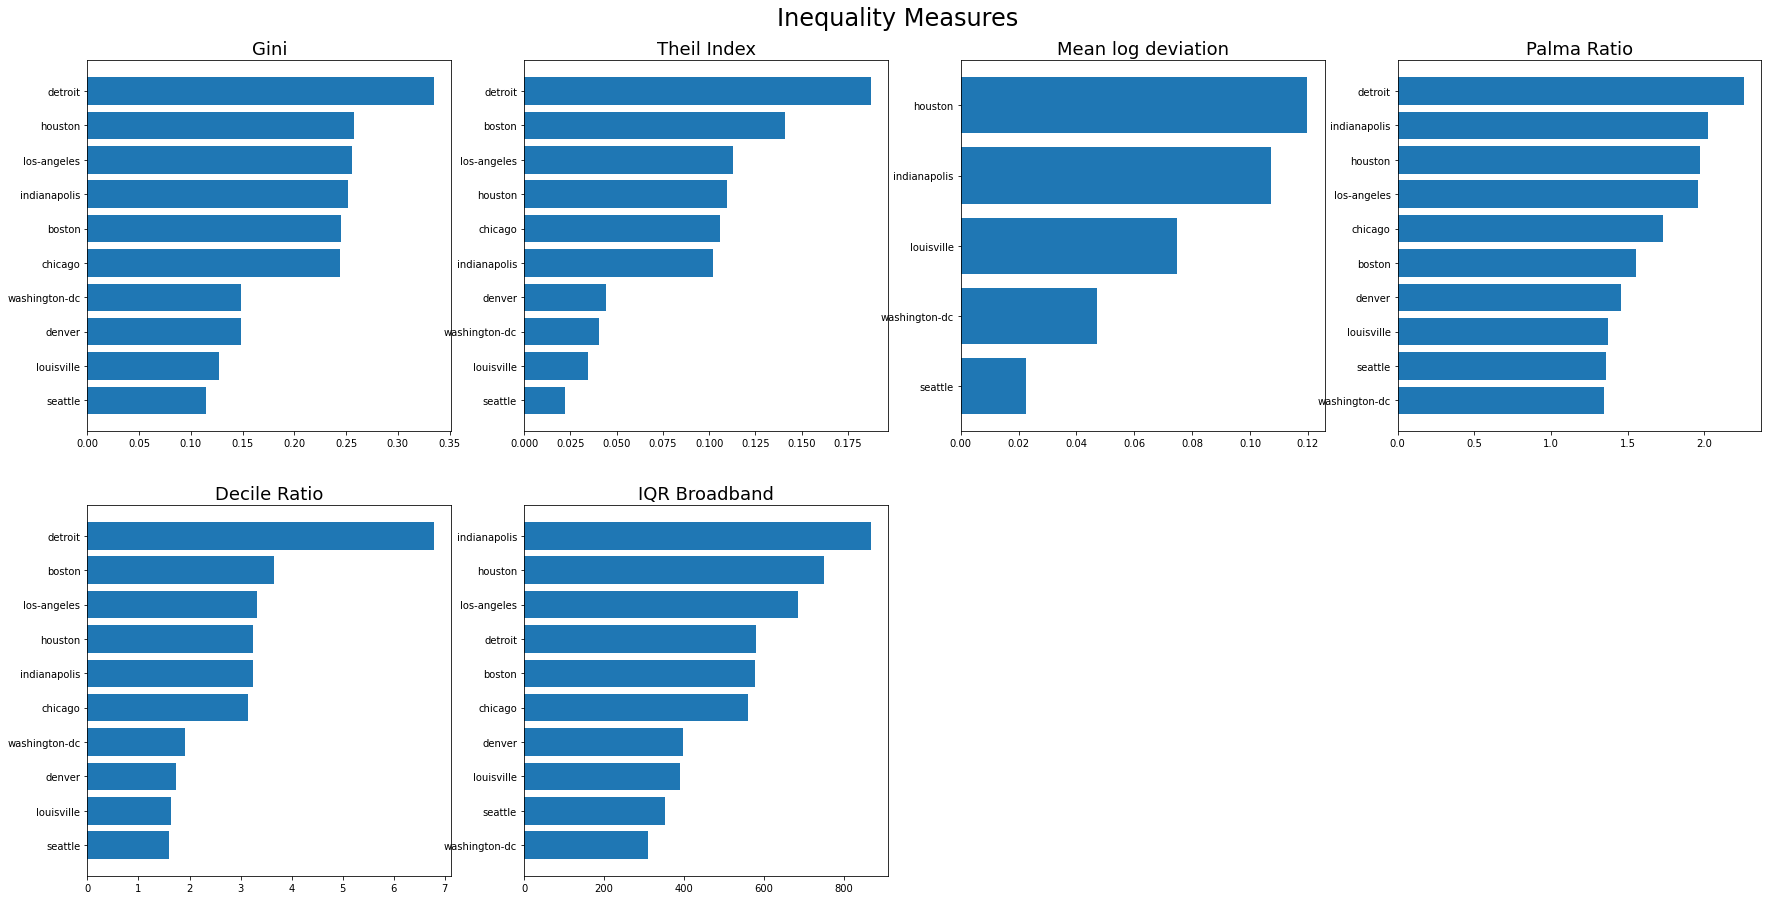

In [71]:
plt.figure(figsize=(30, 15))
plt.suptitle("Inequality Measures", fontsize=24, y=0.93)

for n, measure in enumerate(measures):
    # add a new subplot iteratively
    ax = plt.subplot(2, 4, n + 1)

    graph_inequality_df_sorted = graph_inequality_df_2017.sort_values(measure)
    ax.barh(graph_inequality_df_sorted['City'], graph_inequality_df_sorted[measure])
    
    ax.set_title(measure, fontsize=18)

## 2017-2021 Data

In [72]:
std_2021_df = pd.read_csv('../data/standard_dataframes/standard_acs_censustract_df_2021/standard_acs_censustract_df_2021.csv')

In [73]:
std_2021_df.head()

,Unnamed: 0,City,tract,state,county,STATEFP,COUNTYFP,geometry,Estimate!!Total: TOTAL POPULATION,Estimate!!Total: SEX BY AGE,...,PERC Estimate!!Total:!!Male: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: HEALTH INSURANCE COVERAGE STATUS BY SEX BY AGE,PERC Estimate!!Total: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: PRIVATE HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Male: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,PERC Estimate!!Total:!!Female: PUBLIC HEALTH INSURANCE STATUS BY SEX BY AGE,index_right,Neighborhood
0,0,boston,373100,25.000,17.0,25,17,"POLYGON ((-71.196879 42.354134, -71.1968629999...",4875.000,4875.000,...,0.547061,0.452939,1.0,0.547061,0.452939,1.0,0.547061,0.452939,17,Brighton
1,1,boston,373500,25.000,17.0,25,17,"POLYGON ((-71.199533 42.342215, -71.199506 42....",6081.000,6081.000,...,0.495786,0.504214,1.0,0.495786,0.504214,1.0,0.495786,0.504214,17,Brighton
2,2,boston,373600,25.000,17.0,25,17,"POLYGON ((-71.194791 42.330384, -71.194672 42....",6840.000,6840.000,...,0.433284,0.566716,1.0,0.433284,0.566716,1.0,0.433284,0.566716,17,Brighton
3,20,boston,806,10.250,57.0,25,25,"POLYGON ((-71.135452 42.364849, -71.135231 42....",4974.500,4974.500,...,0.534878,0.465122,1.0,0.534878,0.465122,1.0,0.534878,0.465122,17,Brighton
4,21,boston,102,22.825,95.3,25,25,"POLYGON ((-71.160899 42.358625, -71.160489 42....",3542.125,3542.125,...,0.489157,0.510843,1.0,0.489157,0.510843,1.0,0.489157,0.510843,17,Brighton


### Theil Index

In [74]:
theil_df_2021 = theil_index(std_2021_df)
theil_df_2021.reset_index(inplace=True)
theil_df_2021 = theil_df_2021.rename(columns = {'index':'City'})
theil_df_2021['Theil rank'] = theil_df_2021['Theil Index'].rank(ascending=False)
theil_df_2021 = theil_df_2021.sort_values(by=['Theil Index'])
theil_df_2021

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,City,Theil Index,Theil rank
9,seattle,0.013534,10.0
8,louisville,0.028363,9.0
7,washington-dc,0.032676,8.0
6,denver,0.049382,7.0
5,houston,0.079721,6.0
4,indianapolis,0.081111,5.0
3,chicago,0.089753,4.0
2,los-angeles,0.089881,3.0
1,boston,0.132149,2.0
0,detroit,0.134556,1.0


### Atkinson Index

In [75]:
### coming soon
atkinson_df_2021 = pd.DataFrame()

### Palma Ratio

In [76]:
# A high Palma ratio indicates a greater degree of inequality or unequal broadband distribution in a city
palma_df_2021 = palma_ratio(std_2021_df)
palma_df_2021.reset_index(inplace=True)
palma_df_2021 = palma_df_2021.rename(columns = {'index':'City'})
palma_df_2021['Palma rank'] = palma_df_2021['Palma Ratio'].rank(ascending=False)
palma_df_2021 = palma_df_2021.sort_values(by=['Palma rank'])
palma_df_2021

,City,Palma Ratio,Palma rank
0,detroit,1.937941,1.0
1,indianapolis,1.773900,2.0
2,houston,1.703867,3.0
3,los-angeles,1.697226,4.0
4,chicago,1.630039,5.0
5,boston,1.432626,6.0
6,denver,1.392145,7.0
7,louisville,1.309684,8.0
8,seattle,1.280810,9.0
9,washington-dc,1.261580,10.0


### Decile Ratio

In [77]:
# A high Decile ratio indicates a greater degree of inequality or unequal broadband distribution in a city
decile_df_2021 = decile_ratio(std_2021_df)
decile_df_2021.reset_index(inplace=True)
decile_df_2021 = decile_df_2021.rename(columns = {'index':'City'})
decile_df_2021['Decile rank'] = decile_df_2021['Decile Ratio'].rank(ascending=False)
decile_df_2021 = decile_df_2021.sort_values(by=['Decile rank'])
decile_df_2021

,City,Decile Ratio,Decile rank
0,detroit,4.089286,1.0
1,boston,3.358551,2.0
2,indianapolis,2.944160,3.0
3,los-angeles,2.698057,4.0
4,chicago,2.660180,5.0
5,houston,2.658621,6.0
6,washington-dc,1.662040,7.0
7,denver,1.631109,8.0
8,louisville,1.533925,9.0
9,seattle,1.440854,10.0


### Gini Index

In [78]:
gini_data_2021 = final_gini(std_2021_df)
gini_data_2021['Gini rank'] = gini_data_2021['Gini'].rank(ascending=False)
gini_data_2021 = gini_data_2021.sort_values(by=['Gini rank'])
gini_data_2021

,City,Gini,Gini rank
3,detroit,0.276232,1.0
0,boston,0.229052,2.0
5,indianapolis,0.222454,3.0
6,los-angeles,0.222269,4.0
1,chicago,0.219557,5.0
4,houston,0.214781,6.0
2,denver,0.140524,7.0
9,washington-dc,0.118005,8.0
7,louisville,0.109441,9.0
8,seattle,0.088886,10.0


### Mean Log Deviation

In [79]:
mean_log_data_2021 = mean_log_dev_final(std_2021_df)
mean_log_data_2021['Mean log deviation rank'] = mean_log_data_2021['Mean log deviation'].rank(ascending=False)
mean_log_data_2021 = mean_log_data_2021.sort_values(by=['Mean log deviation rank'])
mean_log_data_2021

/var/folders/25/hlzs3hpj6w9g495524qsm2600000gn/T/ipykernel_3231/2278421374.py:6: RuntimeWarning: divide by zero encountered in log
  log_x = np.log(value)


,City,Mean log deviation,Mean log deviation rank
0,boston,inf,3.5
1,chicago,inf,3.5
2,denver,inf,3.5
3,detroit,inf,3.5
5,indianapolis,inf,3.5
6,los-angeles,inf,3.5
4,houston,0.093652,7.0
7,louisville,0.072317,8.0
9,washington-dc,0.055295,9.0
8,seattle,0.013911,10.0


### IQR

In [80]:
iqr_broadband_df_2021 = iqr_final(std_2021_df)
iqr_broadband_df_2021["IQR rank"] = iqr_broadband_df_2021["IQR Broadband"].rank(ascending=False)
iqr_broadband_df_2021 = iqr_broadband_df_2021.sort_values(by=["IQR rank"])
iqr_broadband_df_2021

,City,IQR Broadband,IQR rank
5,indianapolis,744.416667,1.0
3,detroit,608.000000,2.0
6,los-angeles,602.750000,3.0
4,houston,571.625000,4.0
1,chicago,514.500000,5.0
0,boston,484.000000,6.0
7,louisville,347.912500,7.0
2,denver,310.400000,8.0
9,washington-dc,270.150600,9.0
8,seattle,263.071429,10.0


### Final Result Summary

In [82]:
inequality_df_2021 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(gini_data_2021,theil_df_2021,on='City'),mean_log_data_2021,on='City'), palma_df_2021,on='City'),decile_df_2021,on='City'),iqr_broadband_df_2021,on='City') 
inequality_df_2021

,City,Gini,Gini rank,Theil Index,Theil rank,Mean log deviation,Mean log deviation rank,Palma Ratio,Palma rank,Decile Ratio,Decile rank,IQR Broadband,IQR rank
0,detroit,0.276232,1.0,0.134556,1.0,inf,3.5,1.937941,1.0,4.089286,1.0,608.000000,2.0
1,boston,0.229052,2.0,0.132149,2.0,inf,3.5,1.432626,6.0,3.358551,2.0,484.000000,6.0
2,indianapolis,0.222454,3.0,0.081111,5.0,inf,3.5,1.773900,2.0,2.944160,3.0,744.416667,1.0
3,los-angeles,0.222269,4.0,0.089881,3.0,inf,3.5,1.697226,4.0,2.698057,4.0,602.750000,3.0
4,chicago,0.219557,5.0,0.089753,4.0,inf,3.5,1.630039,5.0,2.660180,5.0,514.500000,5.0
5,houston,0.214781,6.0,0.079721,6.0,0.093652,7.0,1.703867,3.0,2.658621,6.0,571.625000,4.0
6,denver,0.140524,7.0,0.049382,7.0,inf,3.5,1.392145,7.0,1.631109,8.0,310.400000,8.0
7,washington-dc,0.118005,8.0,0.032676,8.0,0.055295,9.0,1.261580,10.0,1.662040,7.0,270.150600,9.0
8,louisville,0.109441,9.0,0.028363,9.0,0.072317,8.0,1.309684,8.0,1.533925,9.0,347.912500,7.0
9,seattle,0.088886,10.0,0.013534,10.0,0.013911,10.0,1.280810,9.0,1.440854,10.0,263.071429,10.0


In [83]:
graph_inequality_df_2021 =  inequality_df_2021.astype({'Theil rank' : "int", "Palma rank" : "int", "Decile rank" : "int","Gini rank" : "int", "Mean log deviation rank" : "int", "IQR rank" : "int" })
graph_inequality_df_2021 = graph_inequality_df_2021.drop(columns=["Gini rank",  "Theil rank", "Palma rank", "Decile rank", "Mean log deviation rank", "IQR rank" ])
graph_inequality_df_2021

,City,Gini,Theil Index,Mean log deviation,Palma Ratio,Decile Ratio,IQR Broadband
0,detroit,0.276232,0.134556,inf,1.937941,4.089286,608.000000
1,boston,0.229052,0.132149,inf,1.432626,3.358551,484.000000
2,indianapolis,0.222454,0.081111,inf,1.773900,2.944160,744.416667
3,los-angeles,0.222269,0.089881,inf,1.697226,2.698057,602.750000
4,chicago,0.219557,0.089753,inf,1.630039,2.660180,514.500000
5,houston,0.214781,0.079721,0.093652,1.703867,2.658621,571.625000
6,denver,0.140524,0.049382,inf,1.392145,1.631109,310.400000
7,washington-dc,0.118005,0.032676,0.055295,1.261580,1.662040,270.150600
8,louisville,0.109441,0.028363,0.072317,1.309684,1.533925,347.912500
9,seattle,0.088886,0.013534,0.013911,1.280810,1.440854,263.071429


In [84]:
measures = list(graph_inequality_df_2021.columns)
measures = measures[1:]
measures

['Gini',
 'Theil Index',
 'Mean log deviation',
 'Palma Ratio',
 'Decile Ratio',
 'IQR Broadband']

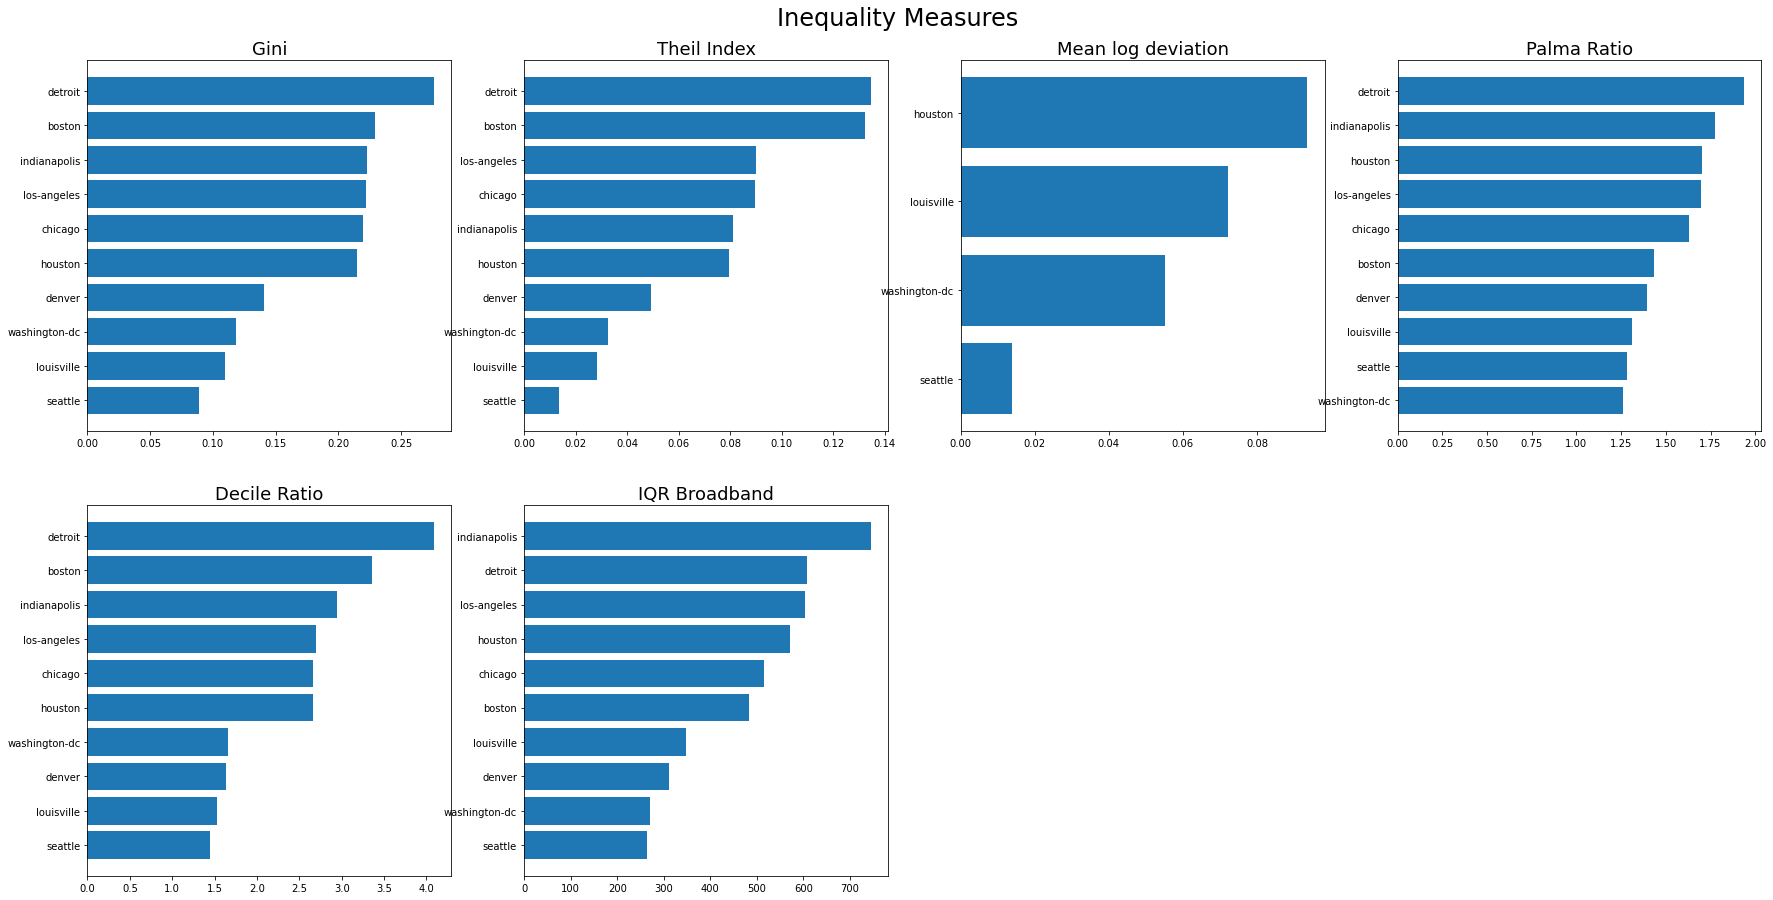

In [85]:
plt.figure(figsize=(30, 15))
plt.suptitle("Inequality Measures", fontsize=24, y=0.93)

for n, measure in enumerate(measures):
    # add a new subplot iteratively
    ax = plt.subplot(2, 4, n + 1)

    graph_inequality_df_sorted = graph_inequality_df_2021.sort_values(measure)
    ax.barh(graph_inequality_df_sorted['City'], graph_inequality_df_sorted[measure])
    
    ax.set_title(measure, fontsize=18)